# Neurailogic Research Center

<div style="font-family: Arial, sans-serif; margin: 20px;">
    <h1 style="text-align: center; color: #333;">EEG Processing: An Entry to the World of Brain Waves</h1>
    <h2 style="text-align: center; color: #555;">Session 9: EEG Source Localization</h2>
    <p style="text-align: center; color: #666; font-size: 16px;">
        Author: Mohammadreza Shahsavari<br>
        Contact: <a href="mailto:mohamadrezashahsavary@gmail.com" style="color: #0066cc; text-decoration: none;">mohamadrezashahsavary@gmail.com</a>
    </p>
</div>

# EEG Source Localization

EEG source localization is a method used to estimate the locations of electrical activity within the brain, based on EEG signals recorded from the scalp. This technique helps in mapping brain functions and understanding neural sources of EEG signals. The basic idea is to find the origins of brain activity by solving mathematical models that relate the recorded EEG signals to their sources.

In the context of EEG, neural activity generates electrical fields, which propagate through various tissue layers (e.g., brain, skull, scalp) before being measured by electrodes on the scalp surface. EEG source localization helps pinpoint where the brain activity originates by solving two key problems: the forward problem and the inverse problem.

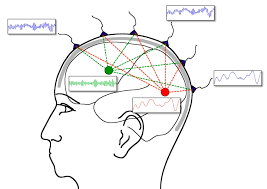

EEG source localization depicting brain activity from two sources, with signals propagating through the brain and captured by scalp electrodes, represented by corresponding EEG waveforms.




## The Forward Problem

The forward problem involves predicting the EEG signals on the scalp given a known source of brain activity. This requires creating an accurate model of the head and brain, known as a head model, that takes into account the different tissue layers (e.g., scalp, skull, cerebrospinal fluid, brain tissue) and their conductivity properties. The head model is based on an MRI or other imaging techniques to reflect the actual anatomy of the subject.

- **Head Modeling**: To solve the forward problem, you need to segment the MRI into different tissue types, as shown in your second image, where the tissue conductivities are specified. In this step, the brain is divided into different regions based on the electrical properties of the tissues (grey matter, white matter, skull, etc.).

- **Meshing**: The meshed MRI image (third image) represents a mathematical discretization of the subject's anatomy. The mesh divides the head into small elements (like cubes or tetrahedrons) that simulate the tissue layers' electrical conductivities, enabling precise calculations of how brain sources generate EEG signals on the scalp.

- **Head Model**: The fourth image is a visual representation of the head model after meshing. It is a simplified version of the head, showing how it has been discretized to simulate the propagation of electrical fields from the brain through the different tissues.

The forward problem uses this model to calculate the potential electrical signals measured by the electrodes, given a hypothetical source in the brain. It’s a well-defined problem because it assumes the source is known and solves for the EEG signal on the scalp.

## The Inverse Problem

The inverse problem is the core challenge of EEG source localization. It aims to estimate the unknown sources in the brain based on the recorded EEG signals. The inverse problem is ill-posed, meaning there are infinitely many possible solutions, and additional constraints or assumptions are needed to narrow down the possible source locations. Techniques such as minimum norm estimates (MNE), beamforming, or dipole fitting are often applied to solve the inverse problem.

## Importance of Forward and Inverse Models

- **Forward Model**: The forward model is essential because it provides the link between brain activity and scalp EEG measurements. An accurate forward model ensures that the estimated sources reflect the actual physiological processes within the brain. Errors in the head model or assumptions about tissue conductivities can lead to inaccurate predictions of EEG signals.

- **Inverse Model**: The inverse model uses the forward model to estimate the source locations from EEG data. It requires careful optimization and assumptions to make the solution biologically plausible, such as restricting the sources to grey matter regions or minimizing the number of active sources.


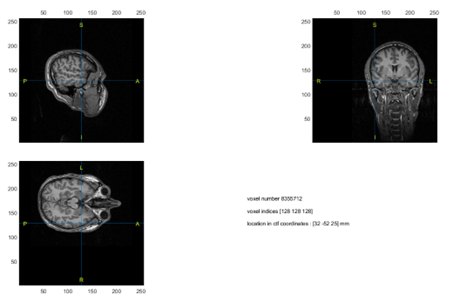

Step 1) shows the subject's MRI, which is the starting point for constructing the forward model.

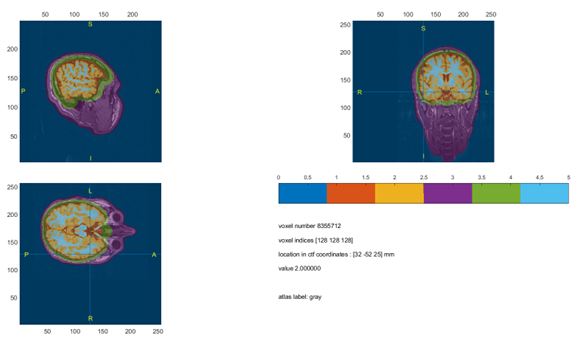

Step 2) Shows the segmented MRI, where different tissue types are identified for conductivity modeling, essential for accurate head modeling.

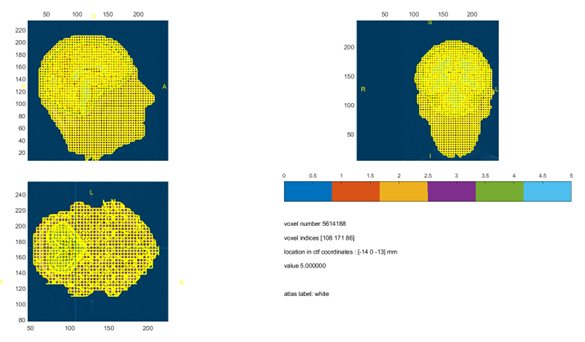

Step 3) Shows a meshed version of the segmented MRI, which represents the discretization of the subject's head into a computational grid.

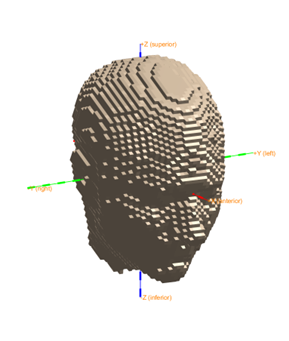

Step 4) Shows a 3D head model based on the meshed MRI, which is used to simulate how electrical signals propagate through the head.

## Run the Below Cell to Download the EDF Data

Run the following cell to download a sample EDF file containing EEG signals along with its associated metadata, such as channel names and also the MRi associated with the subject.

In [2]:
# Installing the required libraries
!pip install gdown

# Downloading the EEG EDF data
import gdown
import os
import zipfile

zip_edf_url = 'https://drive.google.com/uc?id=1uVvpO3sUnuMIQwNPzfGbB2iG5GJCBsIW'
zip_file_name = 'EEGSourceLocalizationDataset.zip'
gdown.download(zip_edf_url, zip_file_name, quiet=False)

# Path to the downloaded zip file
zip_file_path = os.path.join('/content', zip_file_name)

# Unzipping the file
print("Unzipping the file...")
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/EEGSourceLocalizationDataset')  # Extract to specific folder

print("Unzipping completed!")






Downloading...
From (original): https://drive.google.com/uc?id=1uVvpO3sUnuMIQwNPzfGbB2iG5GJCBsIW
From (redirected): https://drive.google.com/uc?id=1uVvpO3sUnuMIQwNPzfGbB2iG5GJCBsIW&confirm=t&uuid=26ed0964-9c49-4c39-af2f-4ab974de9438
To: /content/EEGSourceLocalizationDataset.zip
100%|██████████| 991M/991M [00:11<00:00, 83.1MB/s]


Unzipping the file...
Unzipping completed!


## Import Required Libraries


In [3]:
# note: uncomment the next line for interactive plots
#%matplotlib
!pip install mayavi
!pip install configobj
!pip install mne

import mne
import h5py
import numpy as np
import pandas as pd
import os.path as op
import mayavi.mlab as mlab
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 22.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached vtk-9.3.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.2 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 55.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 61.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 64.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.0/230.0 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.9/268.9 kB 18.2 MB/s eta 0:00:00
Using cached vtk-9.3.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (92.1 MB)
  Created wheel for mayavi: filename=mayavi-4.8.2-cp310-cp310-linux_x86_64.whl size=16753081 sha256=6c4ea582901f6666e81d724e6877773837bcd4844c971364cfffcf0fa718b17e
  Stored in directory: /root/.cach

/usr/local/lib/python3.10/dist-packages/traits/etsconfig/etsconfig.py:425: UserWarning: Environment variable "HOME" not set, setting home directory to /tmp
  warn(


##Function to Load BIDS Data
This cell defines a function called `load_bids()`, which loads EEG data following the BIDS (Brain Imaging Data Structure) standard.

The function:
- Reads EEG epoch data, channel information, and electrode locations.
- Creates a sensor montage.
- Identifies "bad" channels—those with faulty signals—and marks them accordingly.
- Ensures that all necessary metadata is loaded for subsequent processing, such as subject-specific information and fiducial landmarks.


In [4]:
def load_bids(dir_bids, subj_id, task, run_id):
    import mne
    import os.path as op
    import numpy as np
    import pandas as pd
    import json

    bids_fname_base = op.join(dir_bids, 'derivatives', 'epochs', subj_id, 'eeg',
                             '%s_task-%s_%s' % (subj_id, task,  run_id))

    fname_eeg = bids_fname_base + '_epochs.npy'
    fname_chans = bids_fname_base + '_channels.tsv'
    fname_elecs = bids_fname_base.replace(run_id, '') + 'electrodes.tsv'
    fname_coordsys = bids_fname_base.replace(run_id, 'coordsystem.json')

    with open(fname_coordsys) as json_file:
        coordsys = json.load(json_file)

    fiducials = coordsys['AnatomicalLandmarkCoordinates']

    data = np.load(fname_eeg)
    chans = pd.read_csv(fname_chans, sep='\t')
    ch_names = chans.name.tolist()

    elecs = pd.read_csv(fname_elecs, sep='\t')
    dig_ch_pos = dict(zip(ch_names, elecs[['x', 'y', 'z']].values))

    mont = mne.channels.make_dig_montage(dig_ch_pos, nasion=fiducials['NAS'],
                                         rpa=fiducials['RPA'], lpa=fiducials['LPA'],
                                         coord_frame='head')

    info = mne.create_info(ch_names, sfreq=8000,  # todo: srate from bids file
                           ch_types=['eeg']*len(chans))
    epo = mne.EpochsArray(data, info, tmin=-0.25)  # todo: tmin from bids file
    epo.set_montage(mont)

    ch_status = chans.status.tolist()
    bads = [c for c, s in zip(ch_names, ch_status) if s == 'bad']
    epo.info['bads'] = bads
    epo.baseline = (-0.3, -0.05)  # todo: baseline from bids file
    return epo


## Setting Dataset Paths and Loading Data

We define the path to the dataset and specify parameters like the task name, subject ID, and run ID. Since the dataset contains data from multiple subjects, and we are only focusing on a single subject and one specific run, we need to specify these parameters to limit the analysis accordingly. These are used to identify the specific dataset we are working on.

In [5]:
dir_bids = os.path.join('/content/EEGSourceLocalizationDataset', 'Dataset', 'Dataset') # base directory of the BIDS dataset
task = 'seegstim' # task name
subj = 'sub-01' # subject id
run = 'run-07' # rund id

- The directory path `dir_bids` points to where the EEG dataset is stored.
- The task, subject, and run information is used to access specific data for source localization.

##Loading the Dataset

In this step, we load the necessary data for analysis, including EEG epochs, the forward model (which relates EEG signals to brain sources), sEEG channel locations, event markers (stimulus triggers), and a transformation matrix for head-to-surface alignment.

In [6]:
epo = load_bids(dir_bids, subj, task, run) # load epochs
fwd = mne.read_forward_solution(op.join(dir_bids, 'derivatives', 'sourcemodelling', subj, 'fwd', '%s_fwd.fif' % subj)) # load forward solution
seeg_ch_info = pd.read_csv(op.join(dir_bids, 'derivatives', 'epochs', subj, 'ieeg', '%s_task-%s_space-surface_electrodes.tsv' % (subj, task)), sep='\t') # load SEEG channel info
events = pd.read_csv(op.join(dir_bids, 'derivatives', 'epochs', subj, 'eeg', '%s_task-%s_%s_epochs.tsv' % (subj, task, run)), sep='\t') # load events (contain the stimulating channel name)
trans = h5py.File(op.join(dir_bids, 'derivatives', 'sourcemodelling', subj, 'xfm', '%s_from-head_to-surface.h5' % subj)).get('trans')

Not setting metadata
34 matching events found
No baseline correction applied
0 projection items activated
Reading forward solution from /content/EEGSourceLocalizationDataset/Dataset/Dataset/derivatives/sourcemodelling/sub-01/fwd/sub-01_fwd.fif...
    Reading a source space...
    Computing patch statistics...
    Patch information added...
    Distance information added...
    [done]
    Reading a source space...
    Computing patch statistics...
    Patch information added...
    Distance information added...
    [done]
    2 source spaces read
    Desired named matrix (kind = 3523 (FIFF_MNE_FORWARD_SOLUTION_GRAD)) not available
    Read EEG forward solution (8196 sources, 256 channels, free orientations)
    Source spaces transformed to the forward solution coordinate frame


- `load_bids()`: Loads the EEG epochs for the specified subject and task.
- `mne.read_forward_solution()`: Loads the forward model, essential for source localization.
- sEEG channel information and event markers are loaded from CSV files.
- The `trans` matrix aligns the head and brain surfaces.

### Visualizing the EEG Sensor Positions

We can visualize the 3D positions of the EEG sensors, where red indicates bad channels.


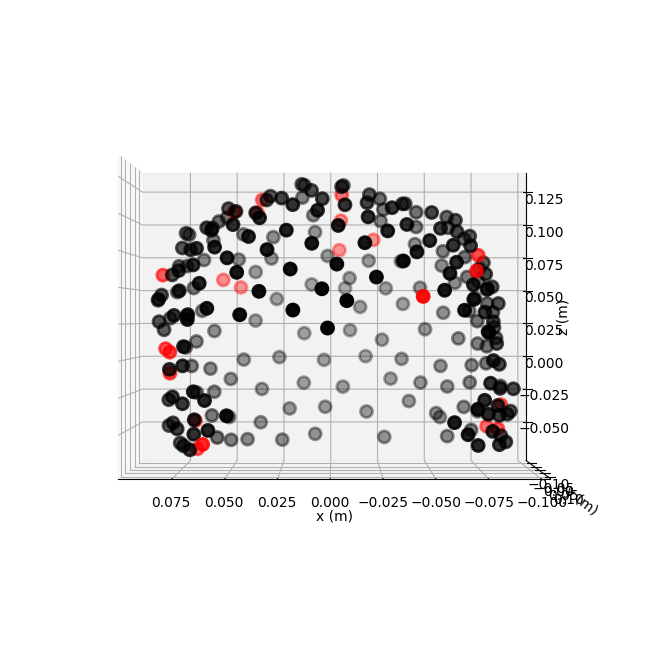

In [7]:
f = epo.plot_sensors(kind='3d') # sensors' positions

- The `plot_sensors()` function provides a 3D view of EEG sensor locations.
- This helps in verifying sensor placement and identifying any faulty channels (marked in red).

### Plotting EEG Data

- Its always helpful to visualize our data, so we plot the time courses of the EEG channels, allowing us to visually explore the signal patterns across different epochs and channels.



Using matplotlib as 2D backend.


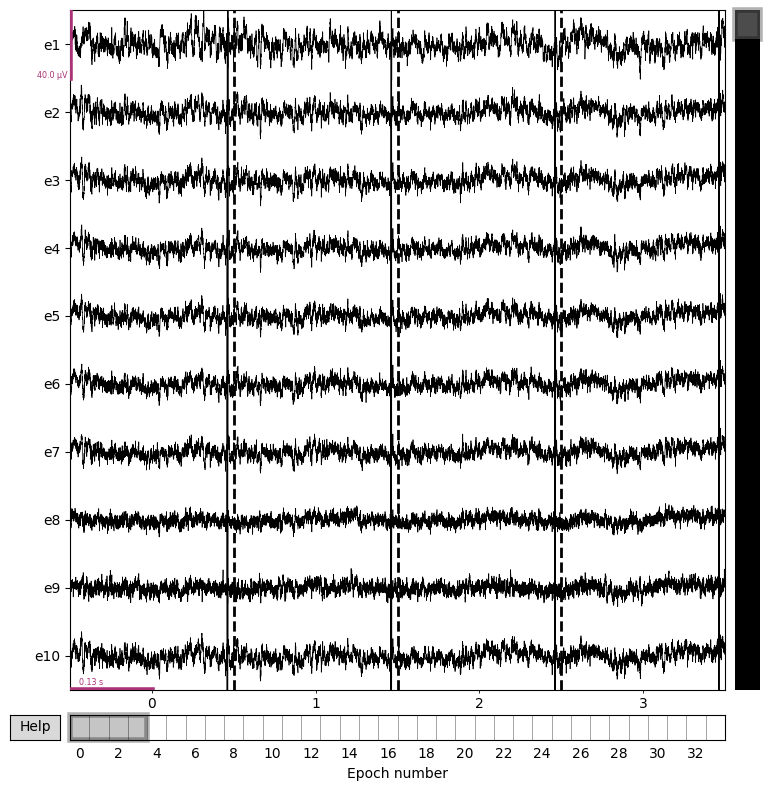

In [8]:
f = epo.plot(n_epochs=4, n_channels=10) # EEG data

##Source localization
Now we are going to go through the necessary steps to perform source localization. First we are going to re-reference the data to the average of all good channels:

In [9]:
epo = epo.set_eeg_reference('average', projection=True)
epo.apply_proj()

EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Created an SSP operator (subspace dimension = 1)
1 projection items activated
SSP projectors applied...


<EpochsArray | 34 events (all good), -0.25 – 0.01 s (baseline -0.3 – -0.05 s (baseline period was cropped after baseline correction)), ~138.5 MB, data loaded,
 '1': 34>



Then we are going to compute the covariance between electrodes, which will be used later when creating the inverse operator:


In [10]:
cov = mne.compute_covariance(epo, method='auto', tmin=-0.25, tmax=-0.05)

    Created an SSP operator (subspace dimension = 1)
    Setting small EEG eigenvalues to zero (without PCA)
Reducing data rank from 234 -> 233
Estimating covariance using SHRUNK
Done.
Estimating covariance using DIAGONAL_FIXED
    EEG regularization : 0.1
Done.
Estimating covariance using EMPIRICAL
Done.
Using cross-validation to select the best estimator.
    EEG regularization : 0.1
    EEG regularization : 0.1
    EEG regularization : 0.1
Number of samples used : 54434
log-likelihood on unseen data (descending order):
   shrunk: -466.661
   empirical: -466.664
   diagonal_fixed: -475.222
selecting best estimator: shrunk
[done]


This cell applies the inverse operator to estimate the locations of brain activity that generated the recorded EEG signals.


In [11]:
inv = mne.minimum_norm.make_inverse_operator(epo.info, fwd, cov, loose=1, depth=0.1)

info["bads"] and noise_cov["bads"] do not match, excluding bad channels from both
Computing inverse operator with 234 channels.
    234 out of 256 channels remain after picking
Selected 234 channels
Creating the depth weighting matrix...
    234 EEG channels
    limit = 8197/8196 = 2.346378
    scale = 661694 exp = 0.1
Whitening the forward solution.
    Created an SSP operator (subspace dimension = 1)
Computing rank from covariance with rank=None
    Using tolerance 4.4e-13 (2.2e-16 eps * 234 dim * 8.4  max singular value)
    Estimated rank (eeg): 233
    EEG: rank 233 computed from 234 data channels with 1 projector
    Setting small EEG eigenvalues to zero (without PCA)
Creating the source covariance matrix
Adjusting source covariance matrix.
Computing SVD of whitened and weighted lead field matrix.
    largest singular value = 6.98933
    scaling factor to adjust the trace = 1.4116e+21 (nchan = 234 nzero = 1)


###Visualizing the Topography of the Evoked Response

We calculate the average evoked response and visualize the topographic distribution of brain activity at specific time intervals.

In [12]:
evo = epo.average()
evo = evo.crop(-0.002, 0.002)

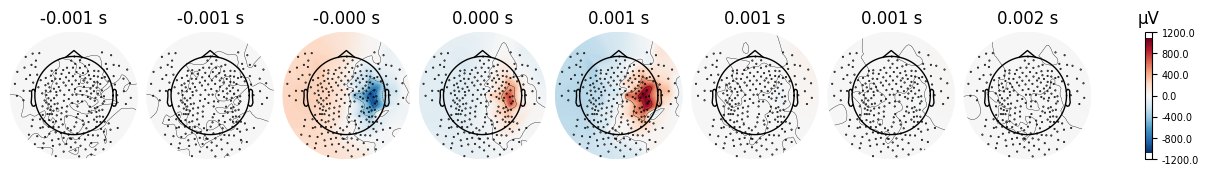

In [13]:
f = evo.plot_topomap(np.arange(-0.001, 0.002, 0.0004))

###Applying the Inverse Operator

We apply the inverse operator to obtain the estimated current values of the brain sources, using the eLORETA method for source localization.

In [14]:
snr = 1
lambda2 = 1. / snr ** 2
stc = mne.minimum_norm.apply_inverse(evo, inv, method='eLORETA', lambda2=lambda2)

Preparing the inverse operator for use...
    Scaled noise and source covariance from nave = 1 to nave = 34
    Created the regularized inverter
    Created an SSP operator (subspace dimension = 1)
    Created the whitener using a noise covariance matrix with rank 233 (1 small eigenvalues omitted)
    Computing optimized source covariance (eLORETA)...
        Using independent orientation weights
        Fitting up to 20 iterations (this make take a while)...
        Converged on iteration 8 (9.1e-07 < 1e-06)
        Updating inverse with weighted eigen leads
[done]
Applying inverse operator to "1"...
    Picked 234 channels from the data
    Computing inverse...
    Eigenleads already weighted ... 
    Computing residual...
    Explained  65.0% variance
    Combining the current components...
[done]


###Plotting Results and Calculating Distance

Finally, we visualize the brain activation time course and 3D positions of the sources and stimulation site. We also compute the Euclidean distance between the peak source activation and the stimulation contact.

In [15]:
stim_info = events.trial_type.unique()[0] # get the stimulating contacts' names
stim_ch = stim_info.split()[0]
stim_chs = [stim_ch.split('-')[0], ''.join(n for n in stim_ch.split('-')[0] if not n.isdigit()) + stim_ch.split('-')[1]] # get monopolar names
stim_coords = seeg_ch_info.loc[seeg_ch_info.name.isin(stim_chs)][['x', 'y', 'z']].values.squeeze() # find the coordinates of the stimulating channels
stim_coords_bip = np.mean(stim_coords, 0) # take the mean between the two contacts
hemi = 'lh' if '\'' in stim_ch else 'rh'

print('Stimulation channels: %s (coordinates: %s)' % (stim_ch, np.round(stim_coords_bip, 2).squeeze()))
print('Stimulation intensity: %s' % stim_info.split()[-1])
print('hemisphere: %s' % hemi)

Stimulation channels: S1-2 (coordinates: [ 0.04 -0.02  0.04])
Stimulation intensity: 5mA
hemisphere: rh


In [16]:
peak_ix = stc.get_peak(hemi=hemi, vert_as_index=True) # get the peak of activation
peak_id = stc.get_peak(hemi=hemi)

Text(0, 0.5, 'Current')

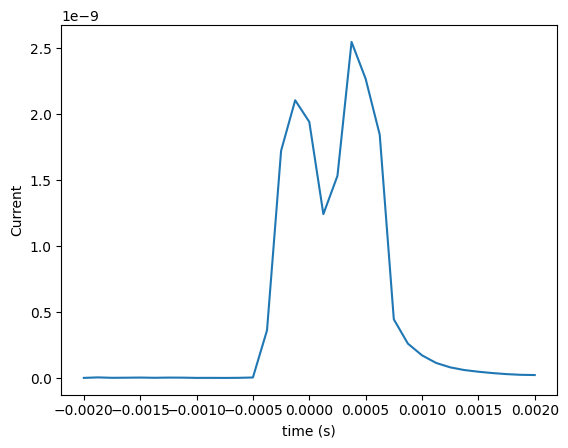

In [17]:
f = plt.plot(stc.times, stc.data[peak_ix[0], :])
plt.xlabel('time (s)')
plt.ylabel('Current')

In [18]:
surf = [mne.transforms.apply_trans(trans, s['rr']) for s in fwd['src']] # get surface coordinates and apply the head-to-surface transform
tris= [s['tris'] for s in fwd['src']] # get mesh triangle faces

hemi_ix = 0 if '\'' in stim_ch else 1 # determine hemisphere being stimulated
curr_max_coords = surf[hemi_ix][peak_id[0],:]

f = mlab.figure()

for s, t in zip(surf, tris):
    mlab.triangular_mesh(s[:,0], s[:,1], s[:,2], t, color=(0.7, 0.7, 0.7), opacity=0.5)

mlab.points3d(*curr_max_coords, scale_factor=0.01, color=(0.0, 0.0, 1.0)) # show the source location in blue
mlab.points3d(*stim_coords_bip, scale_factor=0.01, color=(0.0, 1.0, 0.0)) # show the coordinates of the stimulation site in green

mlab.show()

ImportError: Could not import backend for traitsui.  Make sure you
        have a suitable UI toolkit like PyQt/PySide or wxPython
        installed.

The last command should have opened an interactive 3D window which should look like this:
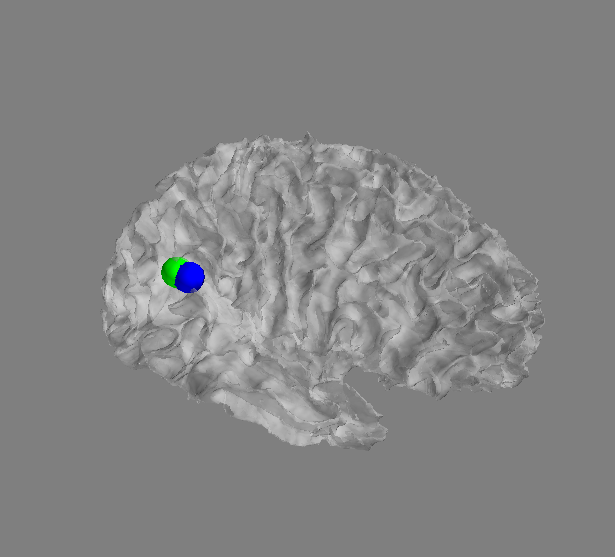

In [19]:
print('Distance between location of the max current value and stimulation coordinates = %.2f mm' % (euclidean(stim_coords_bip, curr_max_coords)*1e3))

Distance between location of the max current value and stimulation coordinates = 28.35 mm
